In [1]:
import os
path = os.path.abspath(os.getcwd())

In [2]:
import math
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.style.use('ggplot')

# Set the default size of various textual elements
plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

plt.rcParams['text.color'] = '#000000'
plt.rcParams['axes.labelcolor'] = '#000000'
plt.rcParams['xtick.color'] = '#000000'
plt.rcParams['ytick.color'] = '#000000'

a, b, c = 18, 20, 24
plt.rcParams['font.size'] = b            # sets the default font size
plt.rcParams['axes.labelsize'] = c       # for x and y labels 
plt.rcParams['axes.titlesize'] = c       # for subplot titles
plt.rcParams['xtick.labelsize'] = a      # for x-axis tick labels
plt.rcParams['ytick.labelsize'] = a      # for y-axis tick labels
plt.rcParams['legend.fontsize'] = b      # for legend text

plt.rcParams['axes.labelpad'] = 15

In [4]:
pd.set_option("display.max_colwidth",100)

In [5]:
pd.set_option('display.max_columns', None)

# I - Data formatting

In [6]:
data_files = ["model"+str(i) for i in range(1,5)]

In [7]:
def import_csv(filename): 
    data_path = path + "\\data\\" + filename + ".csv"
    data = pd.read_csv(data_path)
    data["time"] = data["time"].str.replace("s", "")
    data["function"] = data["function"].str.replace("T", "T_")
        
    return data

In [8]:
filename = data_files[0]
data = import_csv(filename)
data

,time,bit_size,delta_scale,delta_location,function,round,entropy,min_entropy,kl_divergence,statistical_distance
0,68.56,32,48125,3804,data_distrib,0,1.179886,0.451287,3.081705e+01,5.019531e-01
1,3150.85,32,48125,3804,T_1,1,3.248303,1.408103,1.267245e+01,4.907403e-01
2,3240.85,32,48125,3804,T_4,4,6.521856,4.534715,9.081230e+00,4.665142e-01
3,3251.64,32,48125,3804,T_2,2,4.793225,2.849438,1.099903e+01,4.825760e-01
4,3963.21,32,48125,3804,T_5,5,7.105519,5.113052,8.438016e+00,4.575706e-01
...,...,...,...,...,...,...,...,...,...,...
194,80492.38,32,48125,3804,rot_16,6,15.999999,16.000000,0.000000e+00,4.656613e-10
195,81164.15,32,48125,3804,rot_12,3,16.000000,15.999995,-4.768372e-07,2.384186e-07
196,82170.15,32,48125,3804,rot_12,4,15.999999,16.000000,0.000000e+00,4.656613e-10
197,83174.39,32,48125,3804,rot_12,5,15.999999,16.000000,0.000000e+00,4.656613e-10


In [9]:
data.columns

Index(['time', 'bit_size', 'delta_scale', 'delta_location', 'function',
       'round', 'entropy', 'min_entropy', 'kl_divergence',
       'statistical_distance'],
      dtype='object')

# II - Data plotting

In [10]:
def get_pivot_table(filename, metric, functions=None):
    data = import_csv(filename)
    data["function"] = data["function"].str.replace("rot_", "")
    filtered_data = data[data['function'].str.match('[0-9]+')]
    pivot_table = filtered_data.pivot_table(index='round', columns='function', values=metric)
    
    if functions != None:
        pivot_table = pivot_table[functions]
        
    return pivot_table

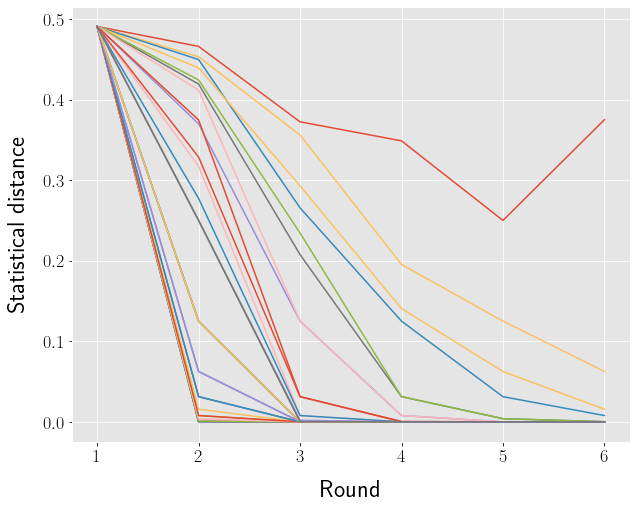

In [11]:
# Plot the pivot table
filename = data_files[0]
pivot_table = get_pivot_table(filename, 'statistical_distance', None)
ax = pivot_table.plot(xticks=pivot_table.index, xlabel="Round", ylabel='Statistical distance')
# ax.set_yscale('symlog')
ax.legend().remove()

In [12]:
dataframes = []
for filename in data_files:
    data = import_csv(filename)
    data["function"] = data["function"].str.replace("rot_", "")
    filtered_data = data[data['function'].str.match('[0-9]+')]
    dataframes.append(filtered_data)
    
combined_df = pd.concat(dataframes)
mean_pivot_table = combined_df.pivot_table(index='round', columns='function', values='statistical_distance', aggfunc='mean')

# Print the mean pivot table
mean_pivot_table = mean_pivot_table.sort_values(by=2, axis=1, ascending=False)

# columns_to_remove = ['32', '1', '4', '8', '27', '12', '30', '10']
# mean_pivot_table = mean_pivot_table.drop(columns_to_remove, axis=1)

columns_to_keep = ['2', '3', '5', '7', '9', '18', '20', '17', '19', '21', '23', '25', '28', '31']
mean_pivot_table = mean_pivot_table[columns_to_keep]

mean_pivot_table.T

round,1,2,3,4,5,6,7,8
function,,,,,,,,
2,0.484427,0.448868,2.994833e-01,1.601562e-01,9.765625e-02,4.003906e-02,1.953125e-03,4.882812e-04
3,0.484427,0.397888,2.304688e-01,8.984375e-02,2.001953e-02,4.943848e-03,9.536743e-07,0.000000e+00
5,0.484427,0.365750,8.007812e-02,4.898071e-03,3.934023e-06,9.604264e-10,2.328306e-10,4.656613e-10
7,0.484427,0.221549,5.920410e-03,6.118501e-10,6.402843e-10,4.365575e-10,4.656613e-10,4.656613e-10
9,0.484427,0.154297,3.147125e-05,6.306524e-10,5.820766e-10,2.910383e-10,4.656613e-10,4.656613e-10
18,0.484427,0.000004,8.116858e-11,2.328306e-10,3.492460e-10,3.783498e-10,4.656613e-10,4.656613e-10
20,0.484427,0.000610,8.731147e-11,2.619345e-10,3.492460e-10,3.783498e-10,4.656613e-10,4.656613e-10
17,0.484427,0.000032,4.085824e-09,8.731147e-11,2.910383e-10,3.201421e-10,4.656613e-10,4.656613e-10
19,0.484427,0.000130,5.820765e-11,2.328306e-10,3.492460e-10,3.783498e-10,4.656613e-10,4.656613e-10


['rot 2', 'rot 3', 'rot 5', 'rot 7', 'rot 9', 'rot 18', 'rot 20', 'rot 17', 'rot 19', 'rot 21', 'rot 23', 'rot 25', 'rot 28', 'rot 31']


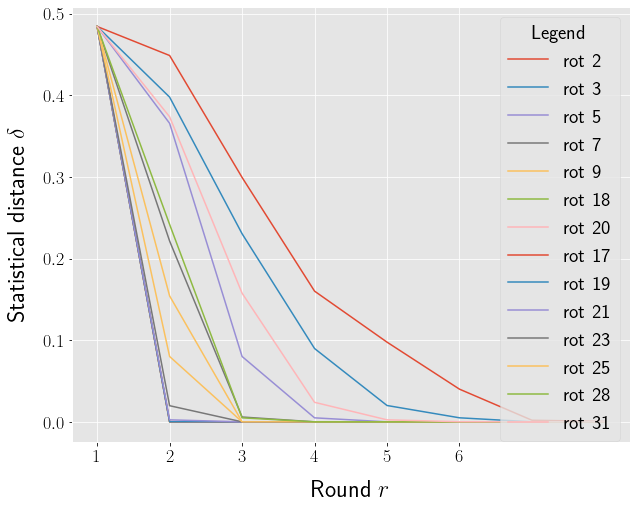

In [27]:
import seaborn as sns
n_colors = len(mean_pivot_table.columns)
color_palette = sns.color_palette('colorblind', n_colors=n_colors)
ax = mean_pivot_table.plot(xticks=pivot_table.index, xlabel=r'Round $r$', ylabel=r'Statistical distance $\delta$', logy=False)#, color=color_palette)

# Plot the modified DataFrame
# ax = mean_pivot_table.plot(xticks=pivot_table.index, xlabel="Round", ylabel='Statistical distance', logy=False)

# Get the legend handles and modified labels
handles, labels = ax.get_legend_handles_labels()
rot_labels = ["rot "+num for num in labels]
print(rot_labels)

# Set the modified labels and a custom title to the legend
ax.legend(handles, rot_labels, title="Legend")

# # Show the plot with the modified legend labels and title
plt.show()

In [14]:
mean_pivot_table.sort_values(by=2, axis=1, ascending=False)

function,2,3,31,5,28,7,9,25,23,21,20,19,17,18
round,,,,,,,,,,,,,,
1,0.484427,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01,4.844273e-01
2,0.448868,3.978882e-01,3.737735e-01,3.657503e-01,2.418976e-01,2.215495e-01,1.542969e-01,8.007812e-02,1.977539e-02,2.441883e-03,6.103814e-04,1.297295e-04,3.245473e-05,4.082918e-06
3,0.299483,2.304688e-01,1.576260e-01,8.007812e-02,4.898071e-03,5.920410e-03,3.147125e-05,1.206994e-06,1.043081e-07,3.474954e-10,8.731147e-11,5.820765e-11,4.085824e-09,8.116858e-11
4,0.160156,8.984375e-02,2.392578e-02,4.898071e-03,3.728201e-08,6.118501e-10,6.306524e-10,3.783498e-10,2.037268e-10,2.911520e-10,2.619345e-10,2.328306e-10,8.731147e-11,2.328306e-10
5,0.097656,2.001953e-02,2.456665e-03,3.934023e-06,2.328307e-10,6.402843e-10,5.820766e-10,5.238690e-10,3.492460e-10,3.492460e-10,3.492460e-10,3.492460e-10,2.910383e-10,3.492460e-10
6,0.040039,4.943848e-03,1.373291e-04,9.604264e-10,2.910383e-10,4.365575e-10,2.910383e-10,5.238690e-10,3.783498e-10,3.783498e-10,3.783498e-10,3.783498e-10,3.201421e-10,3.783498e-10
7,0.001953,9.536743e-07,2.328306e-10,2.328306e-10,4.656613e-10,4.656613e-10,4.656613e-10,9.313226e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10
8,0.000488,0.000000e+00,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,9.313226e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10,4.656613e-10


In [15]:
def find_function_with_lowest_value(pivot_table, round_value):
    """
    Given a pivot table and a round value, return the function number with the lowest associated value.
    
    Args:
    pivot_table (pd.DataFrame): The pivot table.
    round_value (int): The round value.

    Returns:
    str: The function number with the lowest associated value.
    """
    # Extract the row corresponding to the round value
    round_row = pivot_table.loc[round_value]

    # Find the function with the minimum value
    min_function = round_row.idxmin()

    return min_function

round_value = 2
function_with_lowest_value = find_function_with_lowest_value(mean_pivot_table, round_value)
print("The function with the lowest value for round", round_value, "is", function_with_lowest_value)

The function with the lowest value for round 2 is 18


In [16]:
mean_pivot_table[mean_pivot_table.index == 2]

function,2,3,5,7,9,18,20,17,19,21,23,25,28,31
round,,,,,,,,,,,,,,
2,0.448868,0.397888,0.36575,0.221549,0.154297,0.000004,0.00061,0.000032,0.00013,0.002442,0.019775,0.080078,0.241898,0.373774
